**This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).**

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).


8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.


9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Source - UCI

http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [0]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from google.colab import files

In [0]:
import numpy as np

In [0]:
uploaded = files.upload()

Saving household_power_consumption.csv to household_power_consumption (2).csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "household_power_consumption.csv" with length 132960755 bytes


In [0]:
import io

In [0]:
df=pd.read_csv(io.StringIO(uploaded['household_power_consumption.csv'].decode('utf-8')),low_memory=False,sep=";",parse_dates={'DateTime':['Date','Time']},infer_datetime_format=True,index_col='DateTime')


In [0]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [0]:
df['Sub_metering_1'].value_counts()

0.000     1880175
1.000       84936
?           25979
2.000       19017
38.000      16119
           ...   
88.000          3
87.000          3
82.000          3
86.000          2
84.000          2
Name: Sub_metering_1, Length: 89, dtype: int64

In [0]:
df['Global_reactive_power'][6839]

'?'

In [0]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [0]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [0]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


We'll have to fill the missing values of all the columns so we are now gonna replace them with their column's mean values

In [0]:
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)

In [0]:
df.iloc[6839]

Global_active_power        1.091615
Global_reactive_power      0.123714
Voltage                  240.839858
Global_intensity           4.627759
Sub_metering_1             1.121923
Sub_metering_2             1.298520
Sub_metering_3             6.458447
Name: 2006-12-21 11:23:00, dtype: float64

In [0]:
df.iloc[6840]

Global_active_power        1.091615
Global_reactive_power      0.123714
Voltage                  240.839858
Global_intensity           4.627759
Sub_metering_1             1.121923
Sub_metering_2             1.298520
Sub_metering_3             6.458447
Name: 2006-12-21 11:24:00, dtype: float64

In [0]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [0]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


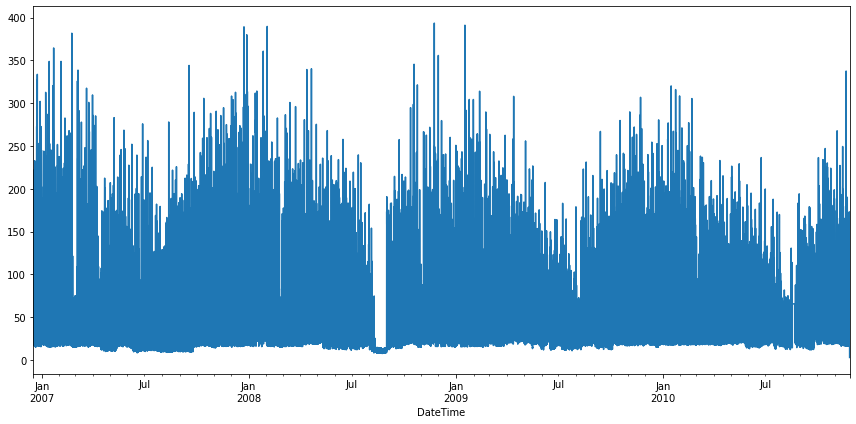

In [0]:
#resampling
plt.figure(figsize=(12,6))
df.Global_active_power.resample('1H').sum().plot()
plt.tight_layout()

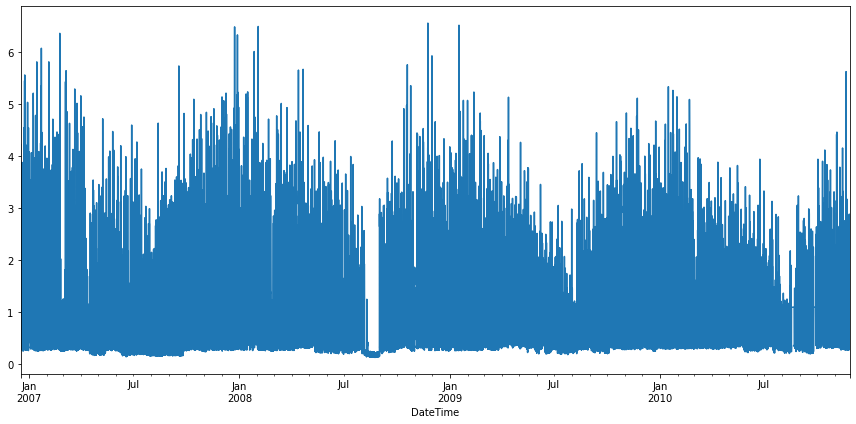

In [0]:
plt.figure(figsize=(12,6))
df.Global_active_power.resample('1H').mean().plot()
plt.tight_layout()

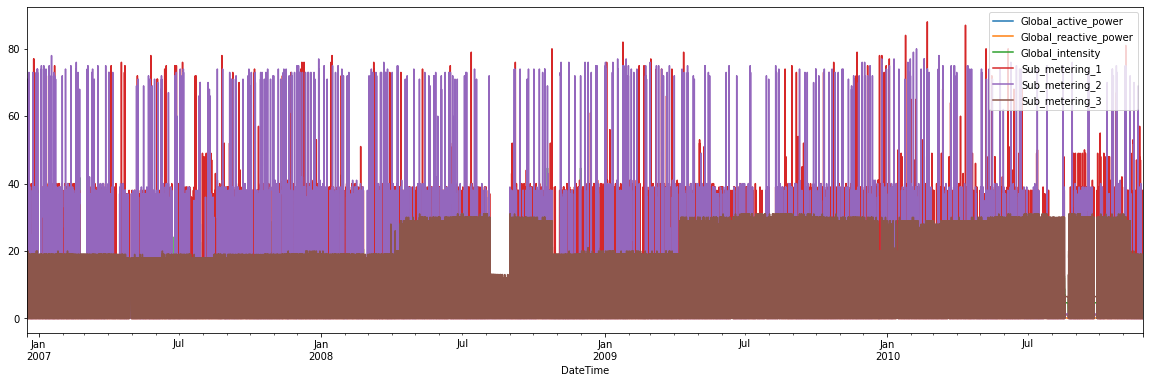

In [0]:
#time-series analysis
df.plot(figsize=(20, 6),)
plt.show()

In [0]:
df.reset_index(inplace=True)
df

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [0]:
def month(x):
    return x.month
df['Month']= df['DateTime'].apply( lambda x: month(x))

In [0]:
def year(x):
    return x.year
df['Year']=df['DateTime'].apply( lambda x: year(x))

In [0]:
def hour(x):
    return x.hour
df['Hour']= df['DateTime'].apply( lambda x: hour(x))

In [0]:
df.drop('DateTime',axis=1,inplace=True)

Lineplot of the yearly,hourly and monthly change of Global_active_power

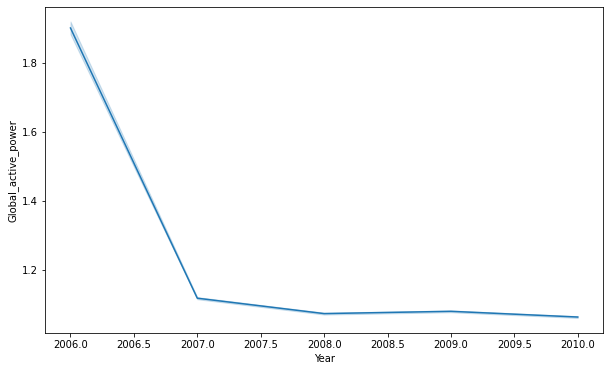

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Global_active_power",
             data=df)

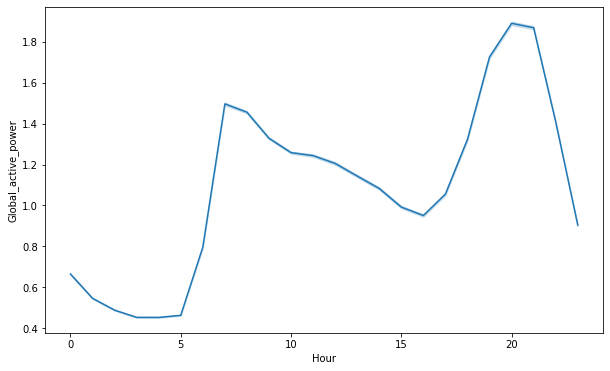

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Hour", y="Global_active_power",
             data=df)

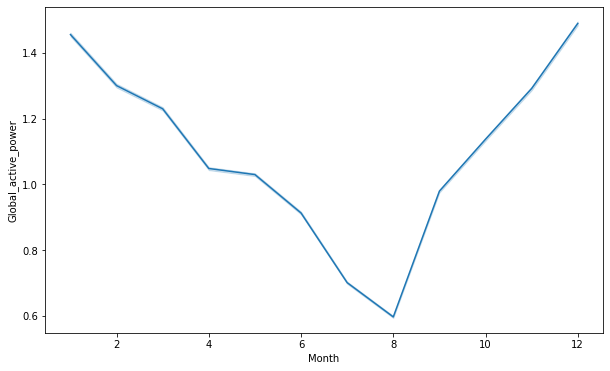

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="Global_active_power",
             data=df)

Monthly change of Global_active_power

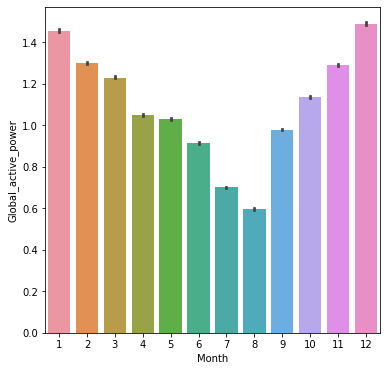

In [0]:
plt.figure(figsize=(6,6))
sns.barplot(x="Month", y="Global_active_power",
             data=df)

Yearly change of Global_active_power

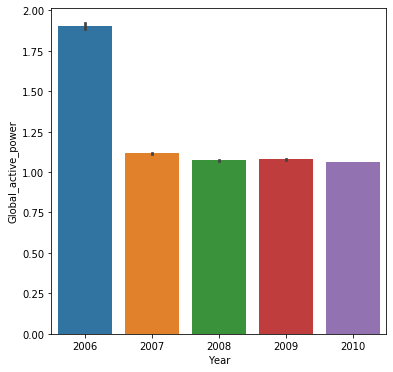

In [0]:
plt.figure(figsize=(6,6))
sns.barplot(x="Year", y="Global_active_power",
             data=df)

Hourly change of Global_active_power

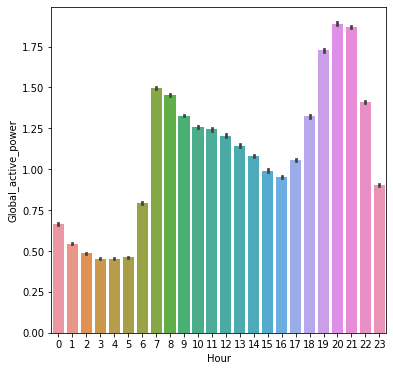

In [0]:
plt.figure(figsize=(6,6))
sns.barplot(x="Hour", y="Global_active_power",
             data=df)

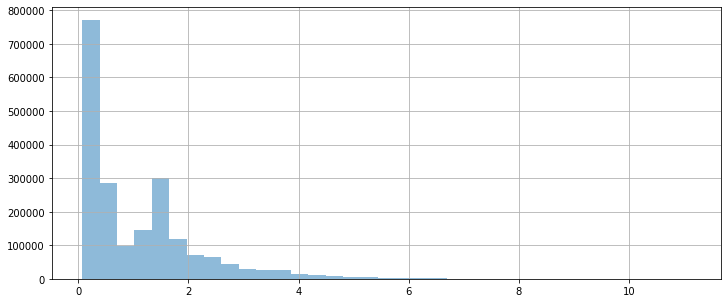

In [0]:
plt.figure(figsize=(12,5))
df['Global_active_power'].hist(bins=35,alpha=0.5)

Correlation matrices for the following data

In [0]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Hour,Year
Global_active_power,1.000000,0.244274,-0.400665,0.998886,0.484638,0.434581,0.637591,0.005624,0.281146,-0.036230
Global_reactive_power,0.244274,1.000000,-0.111692,0.263382,0.122514,0.138475,0.087134,0.012581,0.126441,0.045473
Voltage,-0.400665,-0.111692,1.000000,-0.412306,-0.196332,-0.167620,-0.268375,0.039383,-0.175826,0.254827
Global_intensity,0.998886,0.263382,-0.412306,1.000000,0.489553,0.440372,0.625543,0.005115,0.281508,-0.040551
Sub_metering_1,0.484638,0.122514,-0.196332,0.489553,1.000000,0.054490,0.102193,-0.000982,0.108445,-0.012959
Sub_metering_2,0.434581,0.138475,-0.167620,0.440372,0.054490,1.000000,0.080337,-0.003423,0.087016,-0.036494
Sub_metering_3,0.637591,0.087134,-0.268375,0.625543,0.102193,0.080337,1.000000,-0.000875,0.112796,0.061004
Month,0.005624,0.012581,0.039383,0.005115,-0.000982,-0.003423,-0.000875,1.000000,-0.000882,-0.073954
Hour,0.281146,0.126441,-0.175826,0.281508,0.108445,0.087016,0.112796,-0.000882,1.000000,-0.001449
Year,-0.036230,0.045473,0.254827,-0.040551,-0.012959,-0.036494,0.061004,-0.073954,-0.001449,1.000000


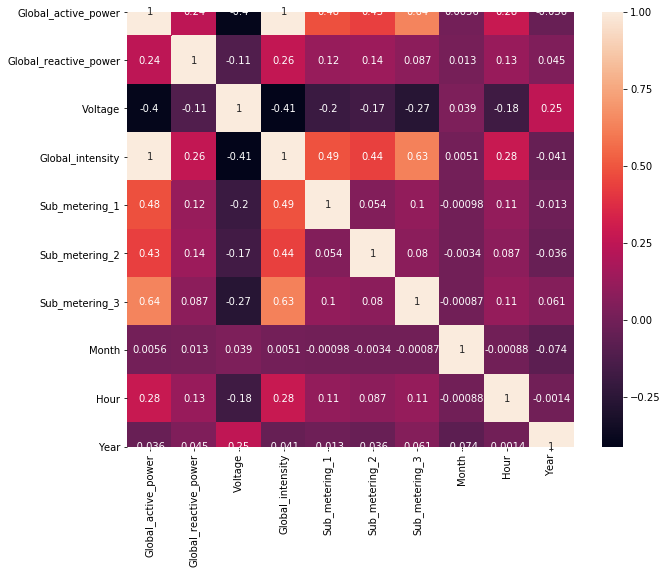

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

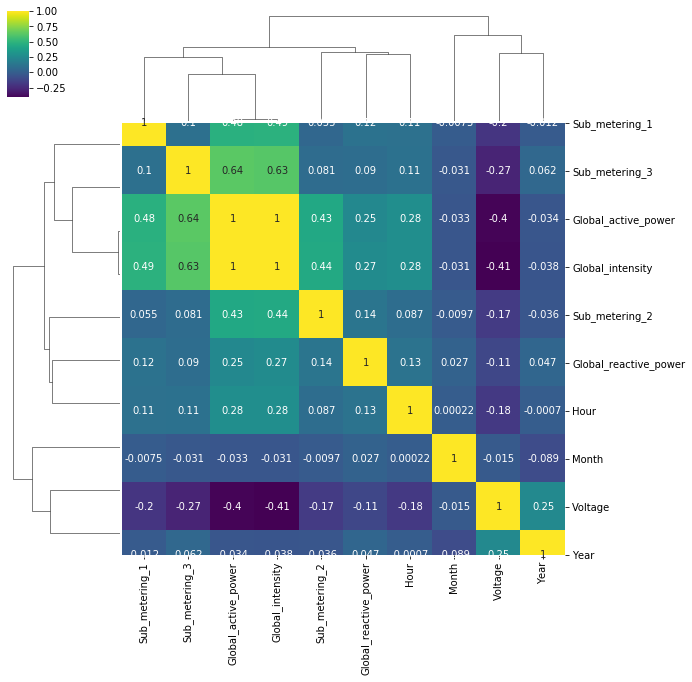

In [0]:
sns.clustermap(df.corr(),cmap='viridis',annot=True)

Scatterplot of Global_active_power and Global_active_power

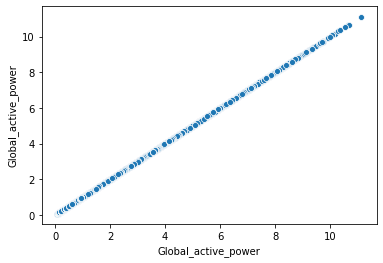

In [0]:
sns.scatterplot(x='Global_active_power',y='Global_active_power',data=df,hue_order=hex)

Lineplot of the yearly,hourly and monthly change of Global_active_power

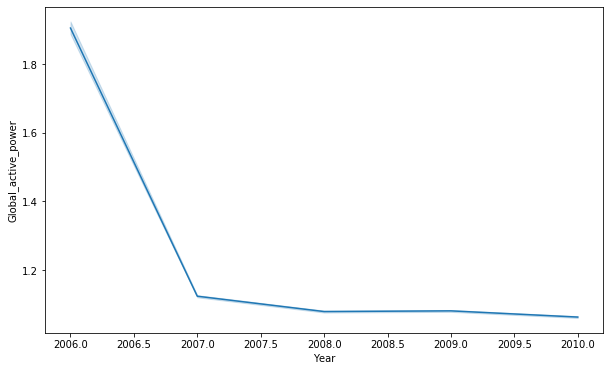

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Global_active_power",
             data=df)

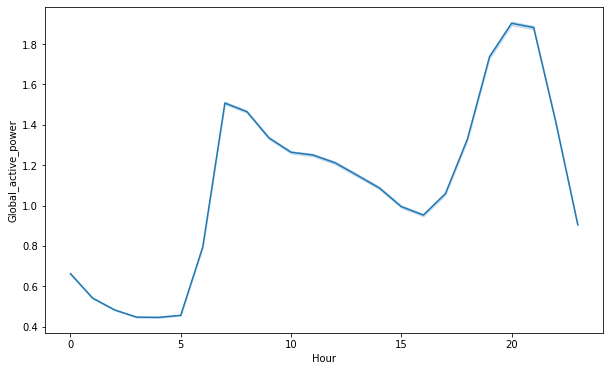

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Hour", y="Global_active_power",
             data=df)

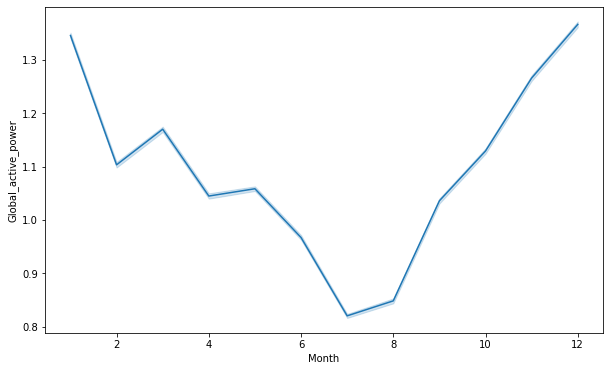

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="Global_active_power",
             data=df)

Monthly change of Global_active_power

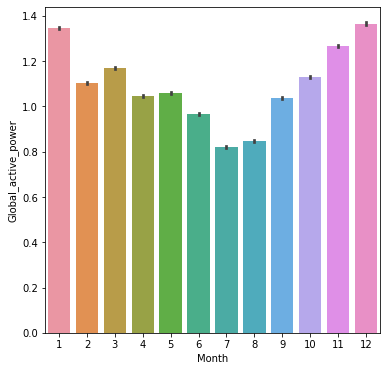

In [0]:
plt.figure(figsize=(6,6))
sns.barplot(x="Month", y="Global_active_power",
             data=df)

Yearly change of Global_active_power

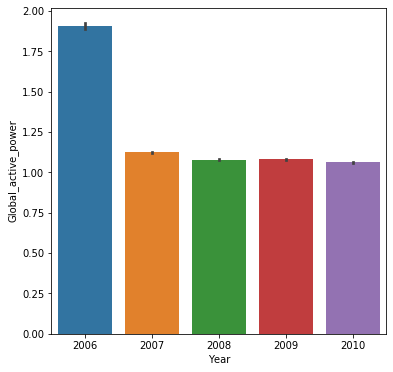

In [0]:
plt.figure(figsize=(6,6))
sns.barplot(x="Year", y="Global_active_power",
             data=df)

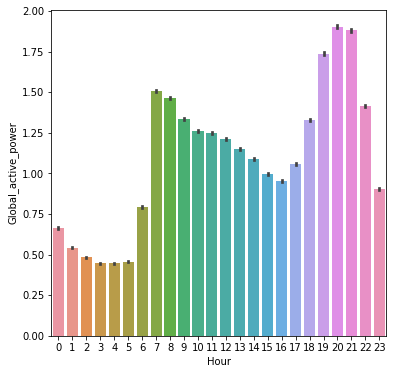

In [0]:
plt.figure(figsize=(6,6))
sns.barplot(x="Hour", y="Global_active_power",
             data=df)

Correlation of Global_active_power with all other data

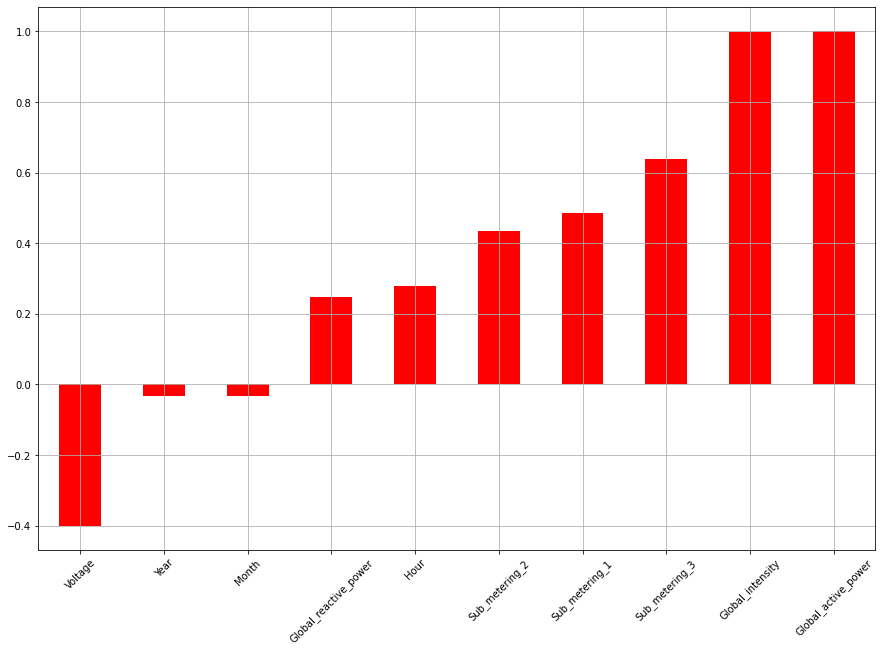

In [0]:
plt.figure(figsize=(15,10))
df.corrwith(df['Global_active_power']).sort_values().plot.bar(color='r',grid=True,rot=45,)

Line plot of the change of monthly change of sub metering 

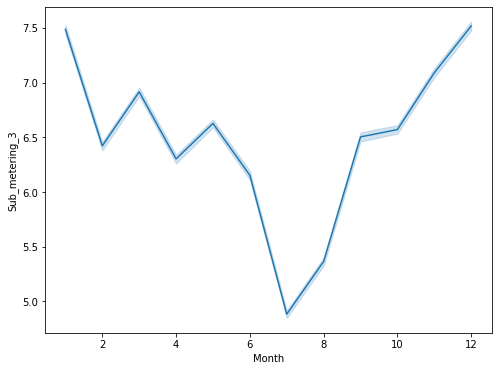

In [0]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Month", y="Sub_metering_3",
             data=df)

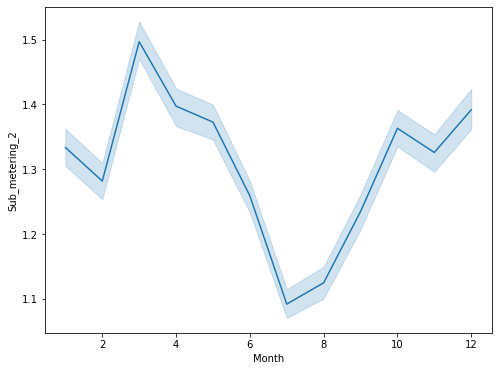

In [0]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Month", y="Sub_metering_2",
             data=df)

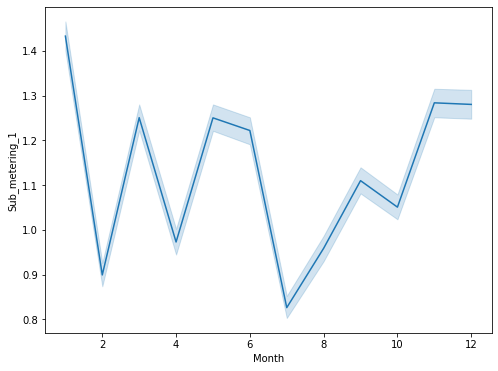

In [0]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Month", y="Sub_metering_1",
             data=df)

Joint Plot of Global_active_power with all 3 Sub_metering

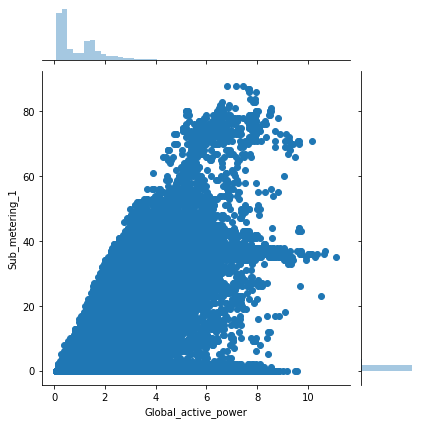

In [0]:
sns.jointplot(x='Global_active_power',y='Sub_metering_1',data=df)

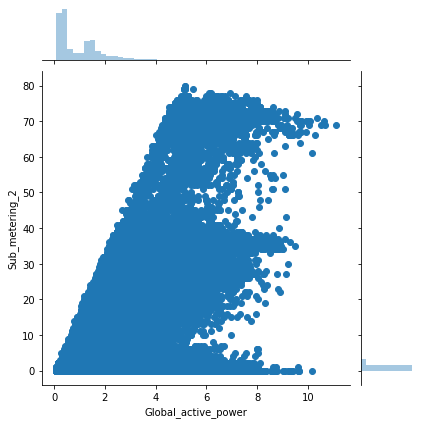

In [0]:
sns.jointplot(x='Global_active_power',y='Sub_metering_2',data=df)

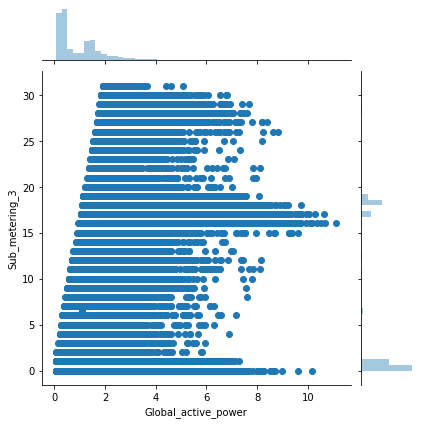

In [0]:
sns.jointplot(x='Global_active_power',y='Sub_metering_3',data=df)

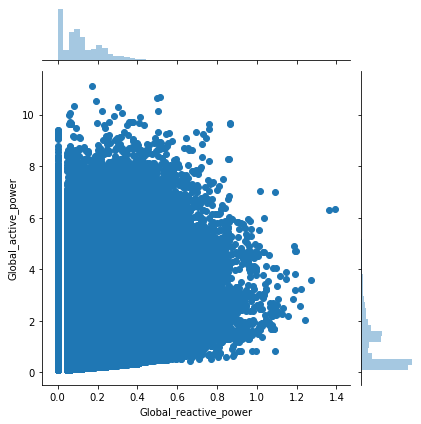

In [0]:
sns.jointplot(x='Global_reactive_power',y='Global_active_power',data=df,kind='scatter')

In [0]:
df=pd.read_csv(io.StringIO(uploaded['household_power_consumption.csv'].decode('utf-8')),low_memory=False,sep=";",parse_dates={'DateTime':['Date','Time']},infer_datetime_format=True,index_col='DateTime')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [0]:
df.corr()['Voltage'].sort_values()

Global_intensity        -0.411363
Global_active_power     -0.399762
Sub_metering_3          -0.268172
Sub_metering_1          -0.195976
Sub_metering_2          -0.167405
Global_reactive_power   -0.112246
Voltage                  1.000000
Name: Voltage, dtype: float64

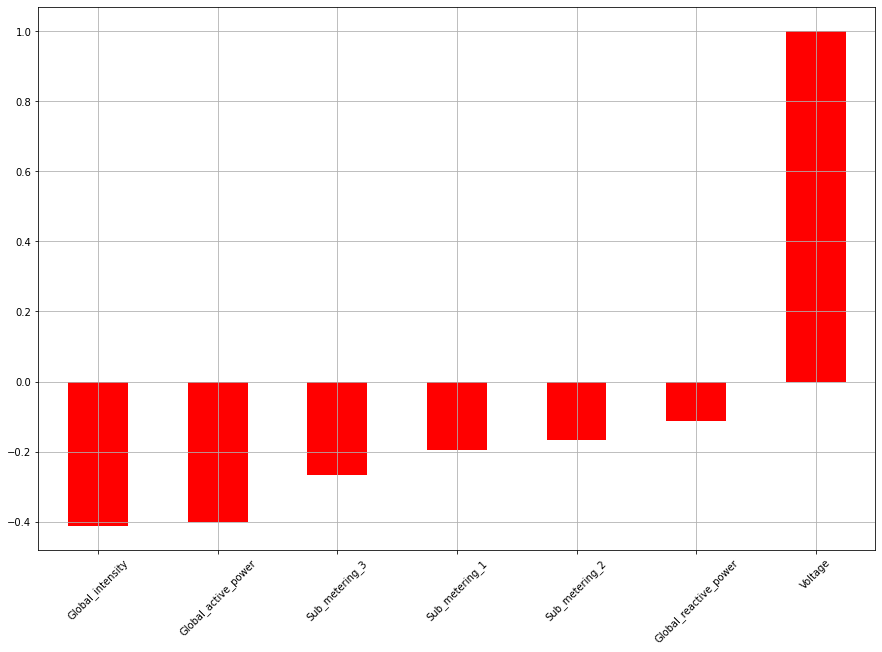

In [0]:
plt.figure(figsize=(15,10))
df.corrwith(df['Voltage']).sort_values().plot.bar(color='r',grid=True,rot=45,)

Since voltage isnt providing much info to our analysis it should be dropped

In [0]:
df.drop('Voltage',axis=1,inplace=True)

In [0]:
df

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,
2006-12-16 17:24:00,4.216,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,3.8,0.0,0.0,0.0


**Setting X and y variables to the .values of the features and label.**

In [0]:
X = df.drop(['Global_active_power'],axis=1).values

In [0]:
y= df['Global_active_power'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [0]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

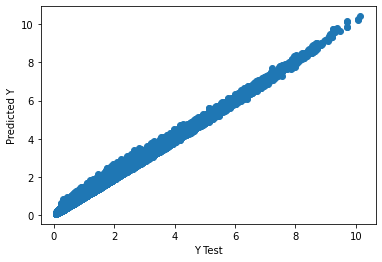

In [0]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [0]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.02709646201046357
MSE: 0.0017921396900874896
RMSE: 0.04233367087895272


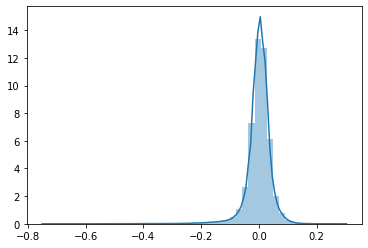

In [0]:
sns.distplot((y_test-predictions),bins=50)

In [0]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_result

,Actual,Predicted
0,0.206,0.220194
1,1.502,1.540396
2,1.806,1.744277
3,0.404,0.466860
4,0.186,0.218130
...,...,...
622573,2.388,2.397641
622574,1.190,1.125562
622575,0.430,0.408882
622576,0.180,0.178138


In [0]:
df.shape

(2075259, 6)

# Creating the Keras Model

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 32kB/s 
     |████████████████████████████████| 450kB 32.1MB/s 
     |████████████████████████████████| 3.9MB 24.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ad4e6b625eab0795a23aeea16f949e462d2918e1672ef9c4a6d497b58417495b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstall

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model=Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [0]:
model.fit(X_train,y_train,epochs=20)

Train on 1452681 samples
Epoch 1/20
1452681/1452681 [==============================] - 181s 125us/sample - loss: 0.0039
Epoch 2/20
1452681/1452681 [==============================] - 194s 134us/sample - loss: 0.0018
Epoch 3/20
1452681/1452681 [==============================] - 187s 129us/sample - loss: 0.0016
Epoch 4/20
1452681/1452681 [==============================] - 182s 125us/sample - loss: 0.0016
Epoch 5/20
1452681/1452681 [==============================] - 190s 131us/sample - loss: 0.0015
Epoch 6/20
1452681/1452681 [==============================] - 191s 131us/sample - loss: 0.0015
Epoch 7/20
1452681/1452681 [==============================] - 187s 129us/sample - loss: 0.0015
Epoch 8/20
1452681/1452681 [==============================] - 173s 119us/sample - loss: 0.0015
Epoch 9/20
1452681/1452681 [==============================] - 181s 125us/sample - loss: 0.0015
Epoch 10/20
1452681/1452681 [==============================] - 190s 131us/sample - loss: 0.0015
Epoch 11/20
1452681/1452

# Evaluating Model Performance

In [0]:
losses = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Loss')

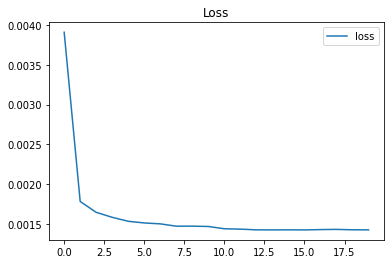

In [0]:
losses.plot()
plt.title('Loss')

In [0]:
predictions_deep = model.predict(X_test)

In [0]:
from sklearn import metrics 
print('Results of Deep Neural Network:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions_deep))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions_deep))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions_deep)))

Results of Deep Neural Network:

Mean Absolute Error: 0.022584582955530973
Mean Squared Error: 0.0012875797165953617
Root Mean Squared Error: 0.035882861042499964


In [0]:
df_1 = pd.DataFrame({'Actual': y_test})

In [0]:
predict_ser=pd.Series(predictions_deep.reshape(622578,))

In [0]:
df1_result=pd.concat([df_1,predict_ser],axis=1)

In [0]:
df1_result

,Actual,0
0,0.250,0.237169
1,1.454,1.416435
2,1.586,1.590441
3,0.364,0.413573
4,1.286,1.302565
...,...,...
622573,0.196,0.234271
622574,0.274,0.270188
622575,0.432,0.421892
622576,1.428,1.393652


In [0]:
df1_result.columns=['Actual','Predicted']

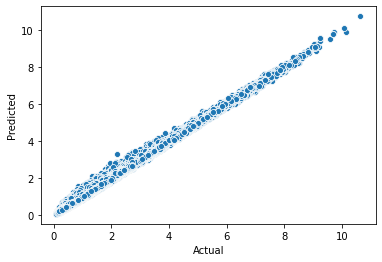

In [0]:
sns.scatterplot(x='Actual',y='Predicted',data=df1_result)

# Thank You